In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import librosa
from scipy.io import wavfile
from scipy.fft import fft
from scipy.signal import cheby2, filtfilt, freqz

In [2]:
from scipy.signal import butter, filtfilt
import sounddevice as sd
from IPython.display import Audio

Sinal de PCG capturado

Duração: 3.50 segundos
Taxa de amostragem: 8000 Hz


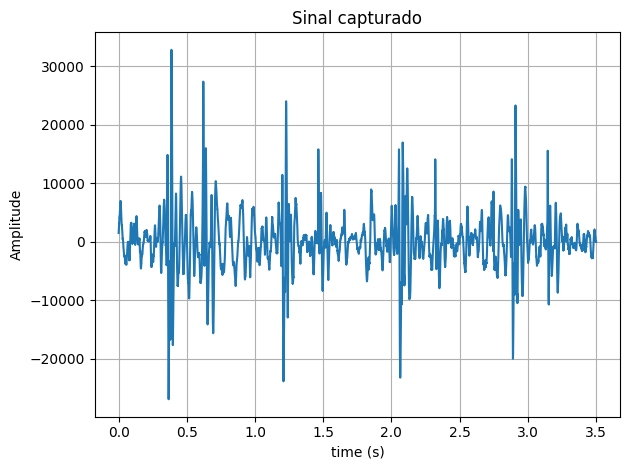

In [3]:
frame_rate, N_signal = wavfile.read('audio_gravado_2.wav')
t = np.arange(0, len(N_signal), 1)/frame_rate
plt.plot(t,N_signal)
plt.title('Sinal capturado')
plt.xlabel('time (s)')
plt.ylabel('Amplitude')
plt.grid()
plt.tight_layout()

# Exibindo informações básicas
print(f'Duração: {len(N_signal)/frame_rate:.2f} segundos')
print(f'Taxa de amostragem: {frame_rate} Hz')

In [4]:
# Reproduzir o áudio processado
Audio(N_signal, rate=frame_rate)

8000


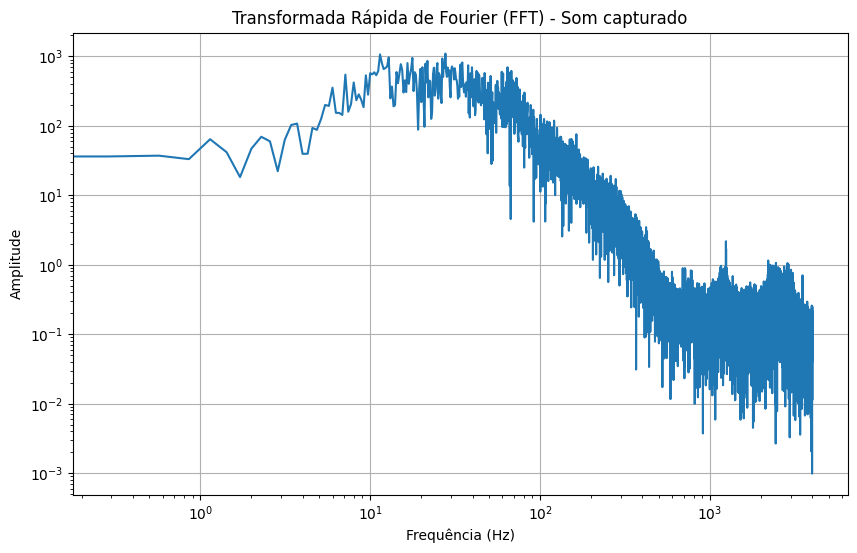

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft

# Calculando a FFT do sinal
N = len(N_signal)
print(frame_rate)
T = 1.0 / frame_rate
frequencies = np.fft.fftfreq(N, T)
fft_values = fft(N_signal)

# Plotando o espectro de frequência
plt.figure(figsize=(10, 6))
plt.plot(frequencies[:N // 2], np.abs(fft_values[:N // 2]) * 2.0 / N)  # Apenas metade do espectro (parte positiva)
plt.xscale('log')
plt.yscale('log')
plt.title('Transformada Rápida de Fourier (FFT) - Som capturado')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


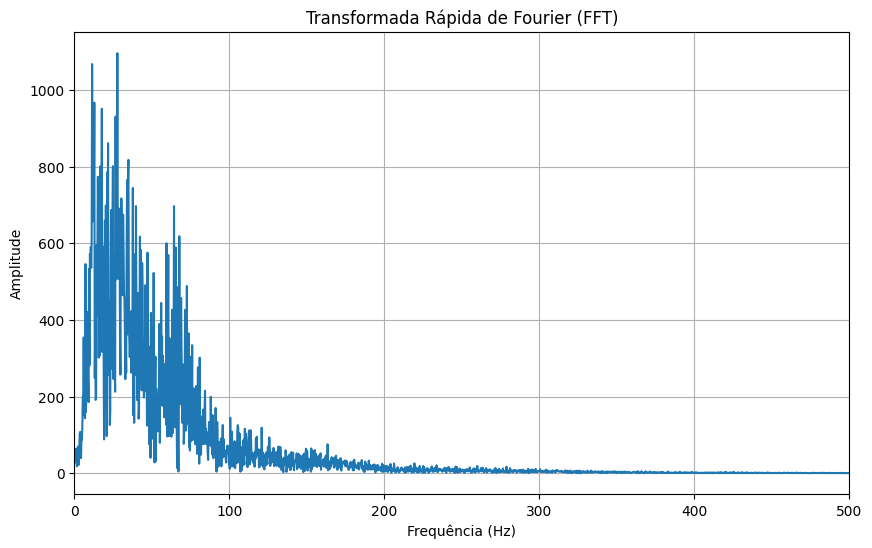

In [6]:
# Plotando o espectro de frequência até 500 Hz
plt.figure(figsize=(10, 6))
plt.plot(frequencies[:N // 2], np.abs(fft_values[:N // 2]) * 2.0 / N)  # Apenas metade do espectro (parte positiva)
plt.title('Transformada Rápida de Fourier (FFT)')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitude')
plt.xlim(0, 500)
plt.grid(True)
plt.show()

In [7]:
# Calculando a magnitude da FFT
magnitude = np.abs(fft_values[:N // 2]) * 2.0 / N

# Encontrando a maior frequência
max_amplitude_index = np.argmax(magnitude)  # Índice da maior amplitude
max_frequency = frequencies[max_amplitude_index]  # Frequência correspondente

# Exibindo a maior frequência
print(f"A maior frequência no espectro é: {max_frequency:.2f} Hz")

A maior frequência no espectro é: 27.71 Hz


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch, butter, filtfilt
from scipy.io import wavfile

# Função para aplicar um filtro passa-baixas
def butter_lowpass_filter(data, cutoff, fs, order=5):
    nyq = 0.5 * fs  # Frequência de Nyquist
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

# Função para aplicar um filtro passa-altas
def butter_highpass_filter(data, cutoff, fs, order=5):
    nyq = 0.5 * fs  # Frequência de Nyquist
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    y = filtfilt(b, a, data)
    return y

# Função para normalizar o sinal
def normalize(data):
    return data / np.max(np.abs(data))

# Carregar o arquivo de áudio do som do coração (em formato WAV, por exemplo)
#sample_rate, data = wavfile.read('recorded_sound_8k1.wav')

sample_rate = frame_rate

data = N_signal


# Se o sinal for estéreo, converta para mono
if len(data.shape) > 1:
    data = np.mean(data, axis=1)

# Normalizar o sinal original
data = normalize(data)

# Aplicar filtro passa-altas para remover componentes de baixíssima frequência (abaixo de 20 Hz)
cutoff_high = 25.0  # 20 Hz
data = butter_highpass_filter(data, cutoff_high, sample_rate)

# Aplicar filtro passa-baixas para remover ruído de alta frequência (acima de 1000 Hz)
cutoff_low = 200.0  # 1000 Hz
data = butter_lowpass_filter(data, cutoff_low, sample_rate)



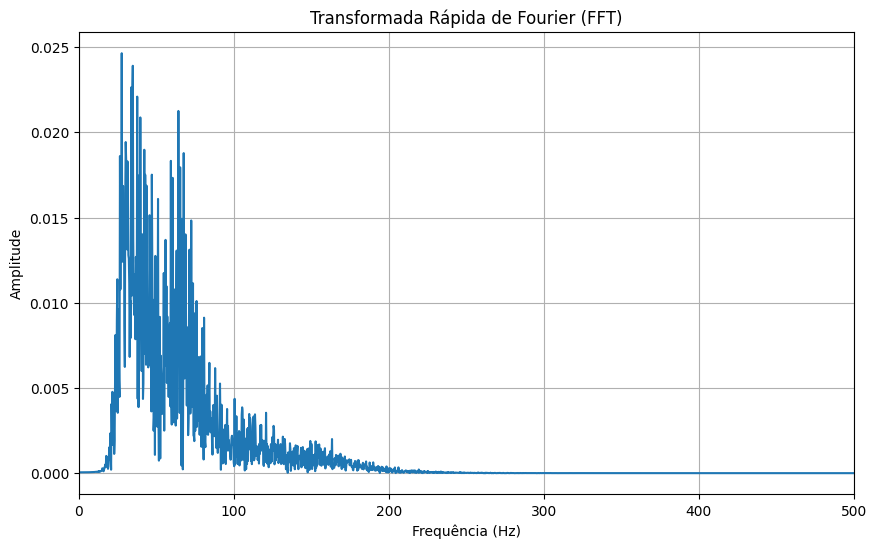

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft

# Calculando a FFT do sinal
N = len(data)
T = 1.0 / sample_rate
frequencies = np.fft.fftfreq(N, T)
fft_values = fft(data)

# Plotando o espectro de frequência
plt.figure(figsize=(10, 6))
plt.plot(frequencies[:N // 2], np.abs(fft_values[:N // 2]) * 2.0 / N)  # Apenas metade do espectro (parte positiva)
#plt.xscale('log')
#plt.yscale('log')
plt.title('Transformada Rápida de Fourier (FFT)')
plt.xlabel('Frequência (Hz)')
plt.xlim(0, 500)
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

8000


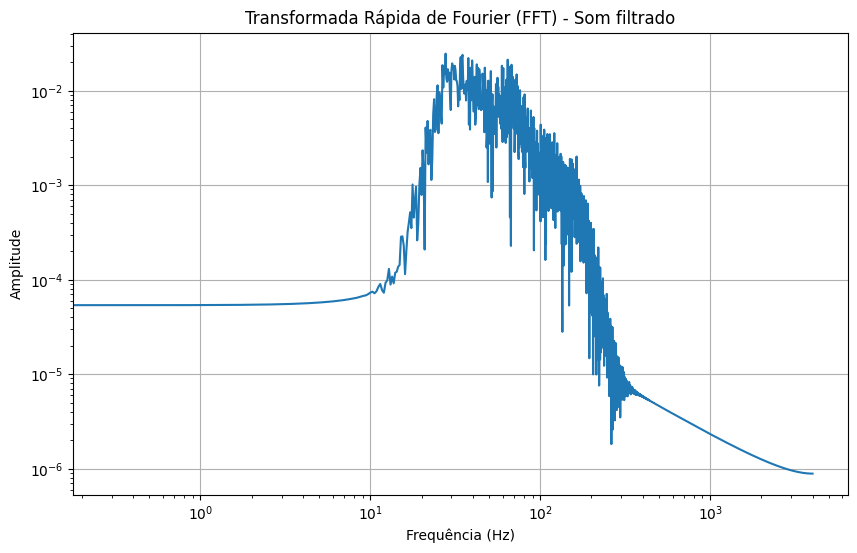

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft

# Calculando a FFT do sinal
N = len(data)
print(frame_rate)
T = 1.0 / frame_rate
frequencies = np.fft.fftfreq(N, T)
fft_values = fft(data)

# Plotando o espectro de frequência
plt.figure(figsize=(10, 6))
plt.plot(frequencies[:N // 2], np.abs(fft_values[:N // 2]) * 2.0 / N)  # Apenas metade do espectro (parte positiva)
plt.xscale('log')
plt.yscale('log')
plt.title('Transformada Rápida de Fourier (FFT) - Som filtrado')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


Duração: 3.50 segundos
Taxa de amostragem: 8000 Hz


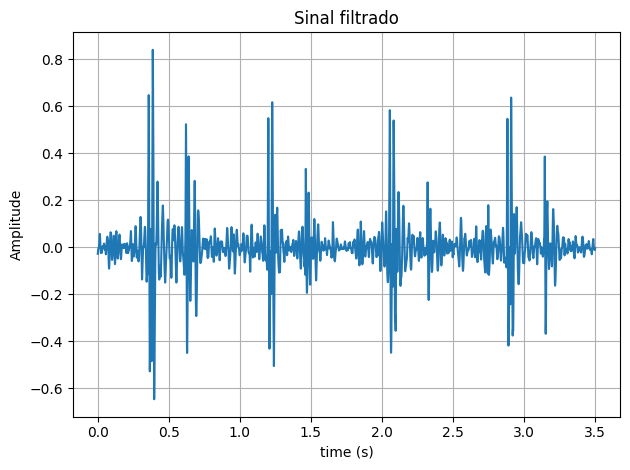

In [11]:
plt.plot(t,data)
plt.title('Sinal filtrado')
plt.xlabel('time (s)')
plt.ylabel('Amplitude')
plt.grid()
plt.tight_layout()

# Exibindo informações básicas
print(f'Duração: {len(data)/sample_rate:.2f} segundos')
print(f'Taxa de amostragem: {sample_rate} Hz')

In [12]:
# Reproduzir o áudio processado
Audio(data, rate=sample_rate)

In [13]:
import noisereduce as nr

# Passo 3: Redução de ruído com a biblioteca noisereduce
reduced_noise_signal = nr.reduce_noise(y=data, sr=sample_rate)

c:\Users\erics\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Duração: 3.50 segundos
Taxa de amostragem: 8000 Hz


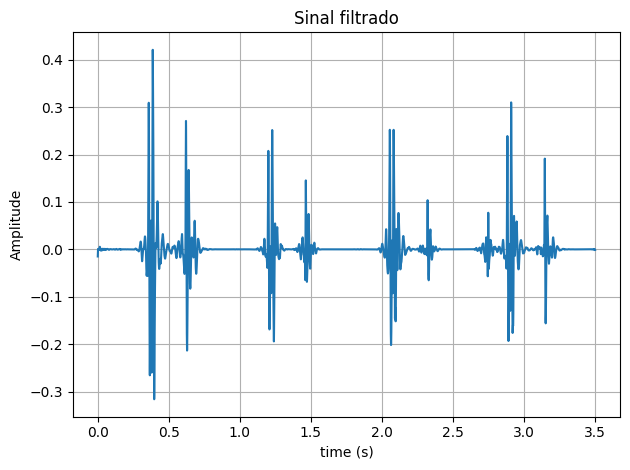

In [14]:
plt.plot(t,reduced_noise_signal)
plt.title('Sinal filtrado')
plt.xlabel('time (s)')
plt.ylabel('Amplitude')
plt.grid()
plt.tight_layout()

# Exibindo informações básicas
print(f'Duração: {len(reduced_noise_signal)/sample_rate:.2f} segundos')
print(f'Taxa de amostragem: {sample_rate} Hz')

In [15]:
# Reproduzir o áudio processado
Audio(reduced_noise_signal, rate=sample_rate)

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, freqz
from scipy.io import wavfile
import pywt

# Análise de Wavelet Contínua usando pywt.ContinuousWavelet
wavelet = pywt.ContinuousWavelet('morl')  # Usando a wavelet Morlet
scales = np.arange(1, 33)

# CWT - Transformada Wavelet Contínua
coefficients, freqs = pywt.cwt(reduced_noise_signal, scales, wavelet, 1 / frame_rate)

plt.subplot(3, 1, 3)
plt.imshow(np.abs(coefficients), extent=[0, len(N_signal) / frame_rate, scales[-1], scales[0]], cmap='pink', aspect='auto')
plt.title('Transformada Wavelet Contínua')
plt.xlabel('Tempo (s)')
plt.ylabel('Escala')

plt.tight_layout()
plt.show()

ModuleNotFoundError: No module named 'pywt'

Som do Coração Normal - Base de dados:

In [16]:
frame_rate_normal, Normal = wavfile.read('amostra2.wav')

FileNotFoundError: [Errno 2] No such file or directory: 'amostra2.wav'

In [62]:
# Reproduzir o áudio processado
Audio(Normal, rate=frame_rate_normal)

Som capturado - 4kHz


In [63]:
frame_rate_4k, som_4k = wavfile.read('recorded_sound_4k.wav')

In [64]:
# Reproduzir o áudio processado
Audio(som_4k, rate=frame_rate_4k)

Som capturado - 8kHz

In [65]:
# Reproduzir o áudio processado
Audio(N_signal, rate=frame_rate)

Som capturado - 16kHz

In [66]:
frame_rate_16k, som_16k = wavfile.read('recorded_sound_16k.wav')

In [67]:
# Reproduzir o áudio processado
Audio(som_16k, rate=frame_rate_16k)

In [17]:
import soundfile as sf
# Supondo que você tenha o áudio processado `reduced_noise_signal` e `sample_rate`
sf.write('amostra_2.wav', reduced_noise_signal, sample_rate)